# Завдання
Побудувати прогноз на 2009-2030 роки до датасету `sunspot`.

## Рішення

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [175]:
sunspot_df = sm.datasets.sunspots.load_pandas().data
sunspot_df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


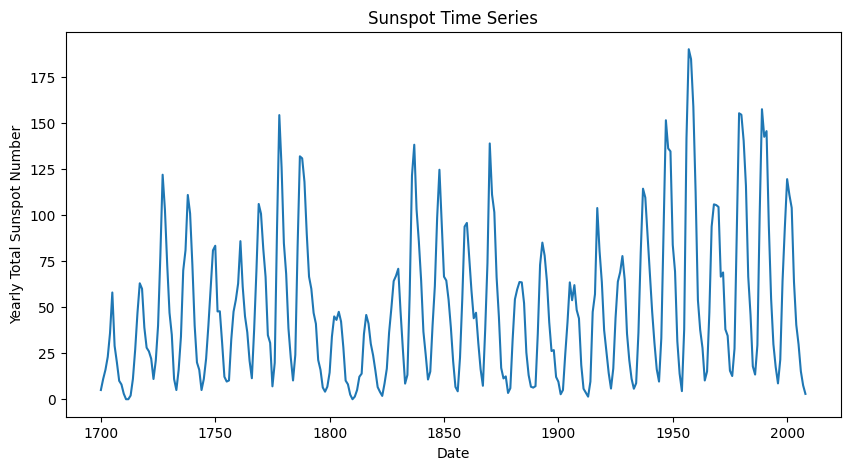

In [176]:
plt.figure(figsize=(10,5))
plt.plot(sunspot_df['YEAR'],sunspot_df['SUNACTIVITY'])
plt.xlabel('Date')
plt.ylabel('Yearly Total Sunspot Number')
plt.title('Sunspot Time Series')
plt.show()

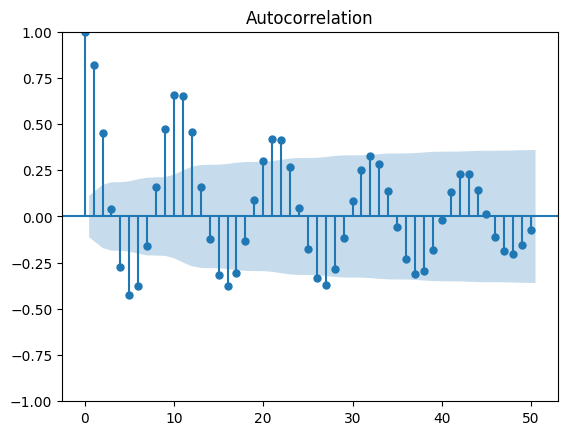

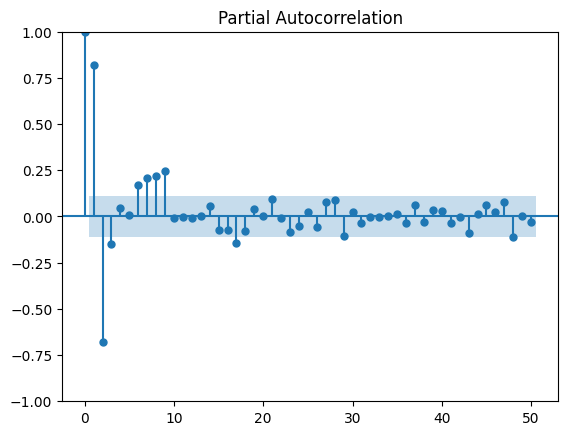

In [177]:
plot_acf(sunspot_df['SUNACTIVITY'], lags=50)
plt.show()

plot_pacf(sunspot_df['SUNACTIVITY'], lags=50, method='ywm')
plt.show()

In [178]:
# Знайдемо оптимальні значення параметрів ARIMA моделі
model = auto_arima(sunspot_df['SUNACTIVITY'], seasonal=False,
                   stepwise=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2578.271, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2835.116, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2730.690, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2743.278, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2833.116, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2611.999, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2575.206, Time=0.36 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2597.162, Time=0.39 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2578.505, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2574.924, Time=0.27 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2576.690, Time=0.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, T

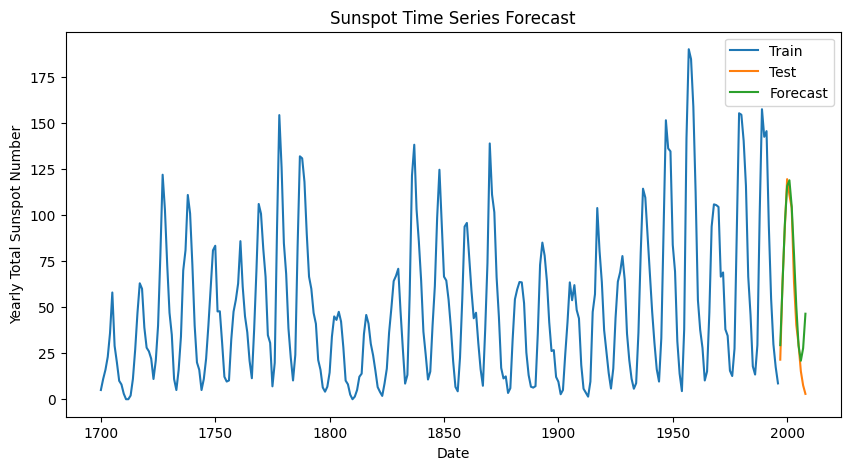

In [179]:
# Навчаємо модель на даних
train = sunspot_df.iloc[:-12]
test = sunspot_df.iloc[-12:]

model = ARIMA(train['SUNACTIVITY'], order=(2,1,3))
model_fit = model.fit()

# Прогнозуємо значення для тестового періоду
forecast = model_fit.forecast(len(test), alpha=0.05)

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(10,5))
plt.plot(train['YEAR'],train['SUNACTIVITY'], label='Train')
plt.plot(test['YEAR'],test['SUNACTIVITY'], label='Test')
plt.plot(test['YEAR'],forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Yearly Total Sunspot Number')
plt.title('Sunspot Time Series Forecast')
plt.legend()
plt.show()

In [180]:
# Прогнозуємо значення на весь доступний період
forecast = model_fit.forecast(len(sunspot_df), alpha=0.05)

# Обчислюємо метрики
mae = mean_absolute_error(sunspot_df['SUNACTIVITY'], forecast)
rmse = np.sqrt(mean_squared_error(sunspot_df['SUNACTIVITY'], forecast))

print('MAE:', mae)
print('MSE:', rmse)

MAE: 37.27060430126741
MSE: 44.09913332540966


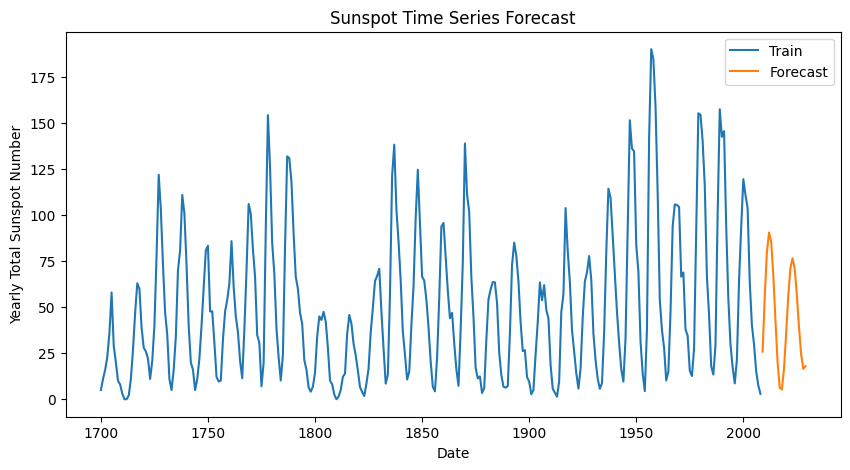

In [181]:
# Прогнозуємо до 2030 року
model = ARIMA(sunspot_df['SUNACTIVITY'], order=(2,1,3))
model_fit = model.fit()
forecast = model_fit.forecast(21, alpha=0.05)

# Візуалізація прогнозу та реальних значень
plt.figure(figsize=(10,5))
plt.plot(sunspot_df['YEAR'], sunspot_df['SUNACTIVITY'], label='Train')
plt.plot(pd.Series(range(2009,2030)), forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Yearly Total Sunspot Number')
plt.title('Sunspot Time Series Forecast')
plt.legend()
plt.show()